<a href="https://colab.research.google.com/github/Machariajane/Dphi-ML-Bootcamp/blob/main/Assignment_3_Notebook_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datathon-2: Notebook Submission
This is a template for Assignment 3 of Machine Learning Bootcamp. Please make sure you perform all tasks within the sections created. This ensures that your assignment is evaluated correctly. 


## Task 1

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

### Load the data and display first 5 rows.

In [ ]:
cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )
cancer_data.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


### Perform Exploratory Data Analysis

In [ ]:
cancer_data.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

In [ ]:
cancer_data=cancer_data.drop_duplicates()

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2284
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2285 non-null   float64
 1   avgDeathsPerYear         2285 non-null   int64  
 2   incidenceRate            2285 non-null   float64
 3   medIncome                2285 non-null   int64  
 4   popEst2015               2285 non-null   int64  
 5   povertyPercent           2285 non-null   float64
 6   studyPerCap              2285 non-null   float64
 7   binnedInc                2285 non-null   object 
 8   MedianAge                2285 non-null   float64
 9   MedianAgeMale            2285 non-null   float64
 10  MedianAgeFemale          2285 non-null   float64
 11  Geography                2285 non-null   object 
 12  AvgHouseholdSize         2285 non-null   float64
 13  PercentMarried           2285 non-null   float64
 14  PctNoHS18_24            

In [ ]:
cancer_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,2285.000000,2285.000000,2285.000000,2285.000000,2.285000e+03,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,580.000000,2285.000000,2285.000000,2285.000000,2166.000000,2285.000000,2285.000000,1824.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000
mean,571.234205,174.378993,448.623549,47074.547484,9.408955e+04,16.844114,157.867047,44.651554,39.553961,42.186389,2.472682,51.851904,18.249147,34.938993,41.103448,6.134004,34.895142,13.245602,54.194783,7.814004,64.572998,48.671930,41.392298,36.177681,19.130197,83.931081,9.178553,1.225134,1.893018,51.349858,5.608094,178.634048
std,1190.111708,421.262817,53.820617,12060.339617,2.600029e+05,6.367053,545.021969,40.949109,5.143357,5.225447,0.437257,6.799192,8.145066,9.090265,11.019673,4.626618,7.007781,5.358782,8.241199,3.424348,10.506903,9.972369,9.315390,7.705536,5.990494,16.047996,14.570705,2.477965,3.300919,6.493298,1.958079,27.381280
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,25.100000,0.000000,0.000000,7.100000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,78.000000,29.000000,421.400000,38928.000000,1.210300e+04,12.100000,0.000000,37.800000,36.400000,39.100000,2.370000,47.800000,12.800000,29.200000,34.075000,3.000000,30.700000,9.300000,48.625000,5.500000,57.600000,41.475000,34.700000,30.900000,14.800000,77.573219,0.634382,0.260382,0.292913,47.813926,4.497369,161.300000
50%,174.000000,62.000000,453.549422,45193.000000,2.702000e+04,15.900000,0.000000,40.900000,39.500000,42.400000,2.500000,52.500000,17.200000,34.600000,40.800000,5.300000,35.300000,12.300000,54.450000,7.600000,65.300000,48.800000,41.300000,36.300000,18.700000,90.223401,2.321900,0.555160,0.824313,51.735016,5.389798,178.100000
75%,512.000000,149.000000,480.900000,52526.000000,6.834800e+04,20.400000,85.804542,43.900000,42.400000,45.300000,2.630000,56.500000,22.600000,40.700000,46.725000,8.100000,39.700000,16.100000,60.300000,9.700000,72.200000,55.700000,47.700000,41.400000,22.900000,95.550013,10.463576,1.188641,2.071795,55.448354,6.469649,195.200000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.930000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


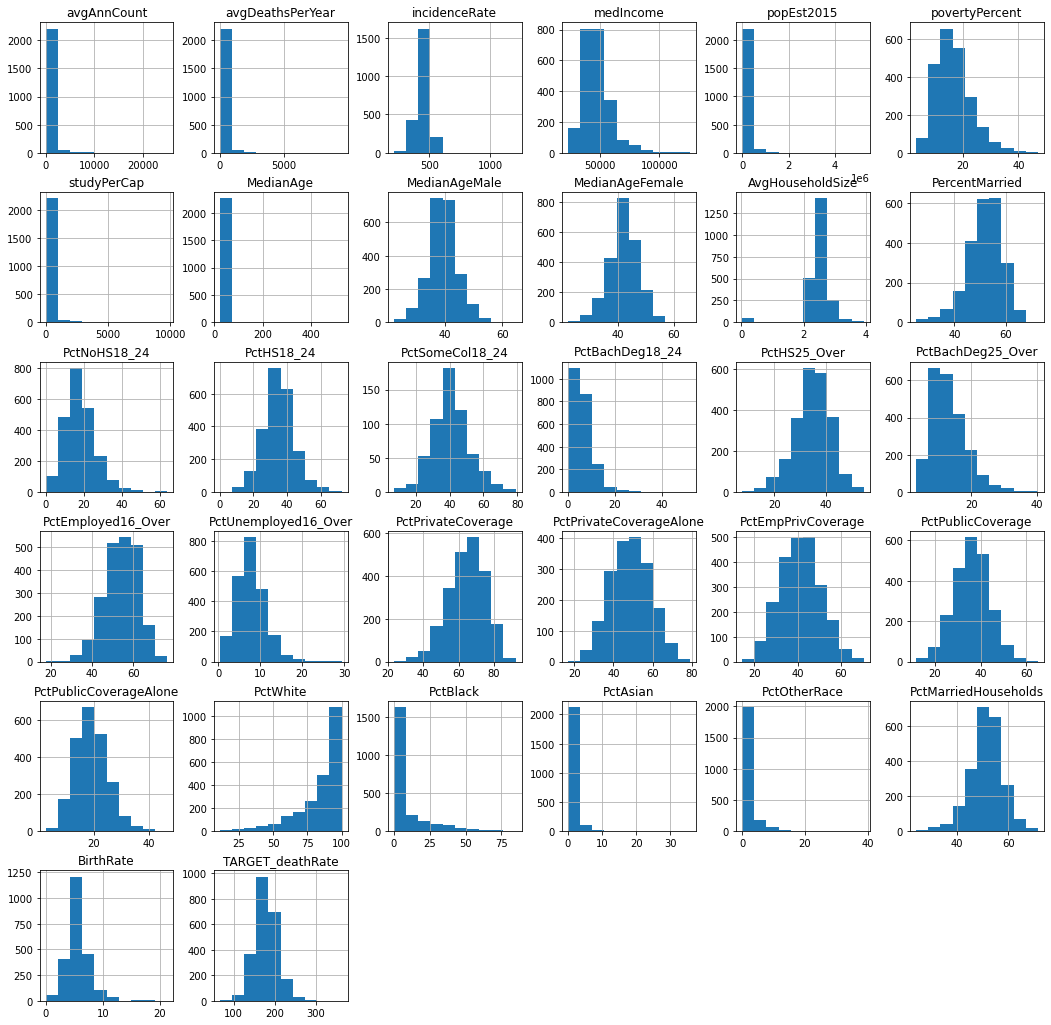

In [ ]:
cancer_data.hist(bins=10, figsize=(18,18))
plt.show()

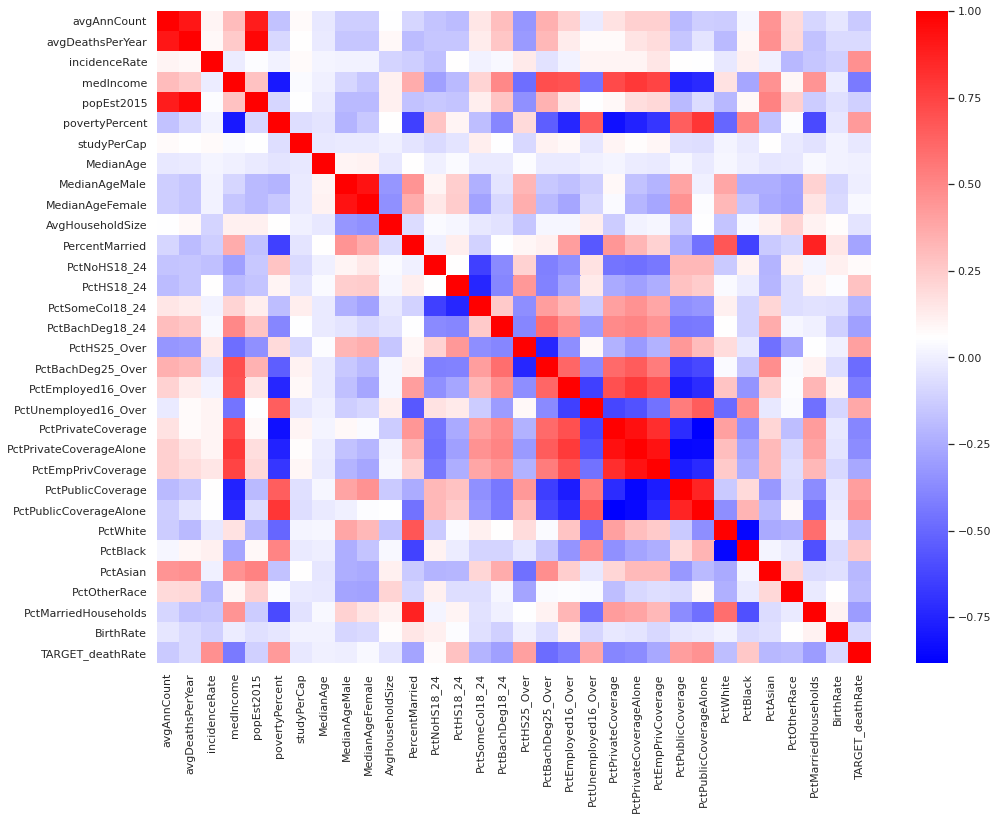

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(cancer_data.corr(), cmap='bwr')     

In [ ]:
sns.pairplot(cancer_data)

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2284
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2285 non-null   float64
 1   avgDeathsPerYear         2285 non-null   int64  
 2   incidenceRate            2285 non-null   float64
 3   medIncome                2285 non-null   int64  
 4   popEst2015               2285 non-null   int64  
 5   povertyPercent           2285 non-null   float64
 6   studyPerCap              2285 non-null   float64
 7   binnedInc                2285 non-null   object 
 8   MedianAge                2285 non-null   float64
 9   MedianAgeMale            2285 non-null   float64
 10  MedianAgeFemale          2285 non-null   float64
 11  Geography                2285 non-null   object 
 12  AvgHouseholdSize         2285 non-null   float64
 13  PercentMarried           2285 non-null   float64
 14  PctNoHS18_24            

### Separate the Input and Target Features of the data

In [ ]:
X = cancer_data.drop('TARGET_deathRate', axis = 1) 


y =cancer_data['TARGET_deathRate']

### Split the data into Train and Test Sets

seperate test and train features before data preparation to reduce bias 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Task 2

### Perform Data Preparation Steps

In [ ]:
X_train.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1376
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          100
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     379
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [ ]:
# eliminate values with more than 20% missingness
X_train = X_train[X_train.columns[X_train.isnull().mean() < 0.2]]

In [ ]:
X_train.isnull().sum()

avgAnnCount                 0
avgDeathsPerYear            0
incidenceRate               0
medIncome                   0
popEst2015                  0
povertyPercent              0
studyPerCap                 0
binnedInc                   0
MedianAge                   0
MedianAgeMale               0
MedianAgeFemale             0
Geography                   0
AvgHouseholdSize            0
PercentMarried              0
PctNoHS18_24                0
PctHS18_24                  0
PctBachDeg18_24             0
PctHS25_Over                0
PctBachDeg25_Over           0
PctEmployed16_Over        100
PctUnemployed16_Over        0
PctPrivateCoverage          0
PctEmpPrivCoverage          0
PctPublicCoverage           0
PctPublicCoverageAlone      0
PctWhite                    0
PctBlack                    0
PctAsian                    0
PctOtherRace                0
PctMarriedHouseholds        0
BirthRate                   0
dtype: int64

In [ ]:
# fill missing column with mean of that column 
X_train['PctEmployed16_Over'].fillna((X_train['PctEmployed16_Over'].mean()), inplace=True)

In [ ]:
X_train.isnull().sum()

avgAnnCount               0
avgDeathsPerYear          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
binnedInc                 0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
Geography                 0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctEmployed16_Over        0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
dtype: int64

In [ ]:
# drop columns that are irrelevant
X_train= X_train.drop(columns=['binnedInc', 'Geography'])

In [ ]:
X_train = X_train.reset_index()

In [ ]:
X_train= X_train.drop(columns=['index'])

Doing the same data preparation on X_test(test features)

In [ ]:
X_test = X_test.reset_index()

In [ ]:
# drop columns that are irrelevant
X_test= X_test.drop(columns=['binnedInc', 'Geography','PctSomeCol18_24','PctPrivateCoverageAlone'])

In [ ]:
X_test.isnull().sum()

index                      0
avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over        19
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [ ]:
X_test['PctEmployed16_Over'].fillna((X_test['PctEmployed16_Over'].mean()), inplace=True)

In [ ]:
X_test= X_test.drop(columns=['index'])

## Task 3

### Build any Machine Learning Model of your choice

Testing out a Linear Regression Model


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluate your model with various Evaluation Metrics

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)
R2 =   r2_score(y_test, y_test_pred)

print('LINEAR REGRESSION')
print('The mean_absolute_error =  ' +str(MAE))
print('The mean_squared_error =  ' +str(MSE))
print('The r2_score =  ' +str(R2))


LINEAR REGRESSION
The mean_absolute_error =  14.073056727195
The mean_squared_error =  346.4700930647792
The r2_score =  0.5636654229655955


### Try out other Machine Learning Models and Evaluate them

Trying RANDOM FOREST REGRESSOR 

In [ ]:
forest = RandomForestRegressor(random_state=1)
 
forest.fit(X_train, y_train)

y_test_forest_pred = forest.predict(X_test)

MAE_Forest = mean_absolute_error(y_test, y_test_forest_pred)
MSE_Forest = mean_squared_error(y_test, y_test_forest_pred)
R2_Forest =   r2_score(y_test, y_test_forest_pred)

print('RANDOM FOREST REGRESSOR')
print('The mean_absolute_error =  ' +str(MAE_Forest))
print('The mean_squared_error =  ' +str(MSE_Forest))
print('The r2_score =  ' +str(R2_Forest))



RANDOM FOREST REGRESSOR
The mean_absolute_error =  13.812192560175053
The mean_squared_error =  362.451283811816
The r2_score =  0.5435391660542647


Trying DECISION TREE REGRESSOR


In [ ]:
decision_tree = DecisionTreeRegressor(random_state = 1, max_depth = 5)

decision_tree.fit(X_train,y_train)

y_test_tree_pred = decision_tree.predict(X_test)

MAE_Tree = mean_absolute_error(y_test, y_test_tree_pred)
MSE_Tree = mean_squared_error(y_test, y_test_tree_pred)
R2_Tree =   r2_score(y_test, y_test_tree_pred)

print('DECISION TREE REGRESSOR')
print('The mean_absolute_error =  ' +str(MAE_Tree))
print('The mean_squared_error =  ' +str(MSE_Tree))
print('The r2_score =  ' +str(R2_Tree))



DECISION TREE REGRESSOR
The mean_absolute_error =  16.17754962383259
The mean_squared_error =  477.57219511328566
The r2_score =  0.39855916591569496


Trying GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
     'bootstrap': [True],
     'max_depth': [10, 20],
     'min_samples_leaf': [3, 4],
     'min_samples_split': [4, 6],
    'n_estimators': [100, 200]
     }


rf = RandomForestRegressor(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

y_test_gs_pred = grid_search.predict(X_test)

MAE_gs = mean_absolute_error(y_test, y_test_gs_pred)
MSE_gs = mean_squared_error(y_test, y_test_gs_pred)
R2_gs =   r2_score(y_test, y_test_gs_pred)

print('GRID SEARCHCV ')
print('The mean_absolute_error =  ' +str(MAE_gs))
print('The mean_squared_error =  ' +str(MSE_gs))
print('The r2_score =  ' +str(R2_gs))


Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   42.7s finished


GRID SEARCHCV 
The mean_absolute_error =  13.903601445877326
The mean_squared_error =  366.8143352324387
The r2_score =  0.5380444632377627


## Task 4

### Perform Hyperparameter Tuning

Hyperparameter tuning on Random Forest model

In [ ]:
# parameters in the initial Random Forest 
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
forest_tuned = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
forest_tuned_random = RandomizedSearchCV(estimator = forest_tuned, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
forest_tuned_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 56.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
# Best parameters after tuning
forest_tuned_random.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

### Evaluate your model 

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
base_accuracy = evaluate(forest, X_test, y_test)

best_random = forest_tuned_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 13.8122 degrees.
Accuracy = 92.10%.
Model Performance
Average Error: 13.8015 degrees.
Accuracy = 92.10%.
Improvement of 0.01%.


## Task 5

### Use any Feature Selection Technique and observe if the model created by selected features performs better than the previous model

Using BORUTA FEATURE SELECTION

In [ ]:
!pip install boruta==0.3

from boruta import BorutaPy

     |████████████████████████████████| 61kB 4.9MB/s 


In [ ]:
# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector = BorutaPy(best_random,  n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	14
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	14
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	14
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	14
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	12
Tentative: 	12
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	12
Tentative: 	12
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	12
Tentative: 	12
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	12
Tentative: 	12
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	12
Tentative: 	12
Rejec

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=90,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=6, n_jobs=None,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7EFEE87C9CA8,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random_st

In [ ]:
print("No. of significant features: ", boruta_selector.n_features_)

No. of significant features:  15


In [ ]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [ ]:
best_random.fit(X_important_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=6, n_jobs=None, oob_score=False,
                      random_state=RandomState(MT19937) at 0x7EFEE87C9CA8,
                      verbose=0, warm_start=False)

In [ ]:
y_important_test_pred = best_random.predict(X_important_test)

Model Evaluation

In [ ]:
MAE_tuned = mean_absolute_error(y_test, y_important_test_pred)
MSE_tuned = mean_squared_error(y_test, y_important_test_pred)
R2_tuned =   r2_score(y_test, y_important_test_pred)

print('RANDOM FO SEARCHCV ')
print('The mean_absolute_error =  ' +str(MAE_tuned))
print('The mean_squared_error =  ' +str(MSE_tuned))
print('The r2_score =  ' +str(R2_tuned))

RANDOM FO SEARCHCV 
The mean_absolute_error =  15.207922618652924
The mean_squared_error =  426.8097393570127
The r2_score =  0.4624879583425201


In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              762 non-null    float64
 1   avgDeathsPerYear         762 non-null    int64  
 2   incidenceRate            762 non-null    float64
 3   medIncome                762 non-null    int64  
 4   popEst2015               762 non-null    int64  
 5   povertyPercent           762 non-null    float64
 6   studyPerCap              762 non-null    float64
 7   binnedInc                762 non-null    object 
 8   MedianAge                762 non-null    float64
 9   MedianAgeMale            762 non-null    float64
 10  MedianAgeFemale          762 non-null    float64
 11  Geography                762 non-null    object 
 12  AvgHouseholdSize         762 non-null    float64
 13  PercentMarried           762 non-null    float64
 14  PctNoHS18_24             7

In [ ]:
test_data= test_data.drop(columns=['binnedInc', 'Geography','PctSomeCol18_24','PctPrivateCoverageAlone'])

In [ ]:
test_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over        33
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [ ]:
test_data['PctEmployed16_Over'].fillna((test_data['PctEmployed16_Over'].mean()), inplace=True)

In [ ]:
# test_important_data = boruta_selector.transform(np.array(test_data))

In [ ]:
# best_random.fit(X_train,y_train)
predictions = grid_search.predict(test_data)

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv',index=False)         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

That is the end of this assignment. We hope you learnt a lot along the way. 
Make sure you complete the other 2 parts (leaderboard submission and quiz) as well.

Now, download this notebook and submit it on the platform: https://dphi.tech/practice/challenge/52#notebooks 
